# 極値分布

例えば最大風速や金融におけるリスク分析など、ある分布$G$に従って生じた$n$個の標本 $X_1, \dots, X_n$の最大値の分布 $M_n := \max\{X_1, \dots, X_n\}$が知りたいことがあります。
そこで便利なのが次の極値分布です。

$$F_n(x) := P(M_n \leq x) = \prod^n_{i=1}P(X_i \leq x) = G^n(x)$$

実は、$\frac{M_n - b_n}{a_n}$ (平均とスケールを変換しただけ) が退化しない分布に収束するとき、それは次に紹介するGumbel分布、Frechet分布、そしてWeibull分布のどれかに収束します。
また、その収束の仕方は元の分布の裾の重さで決まります

* 指数オーダーの裾：Gumbel分布
* 多項式オーダーの裾：Frechet分布
* 有界の裾：Webull分布

---

**Gumbel分布**

$$
G(x) = \begin{cases}
1 - \exp(-\alpha x) & (x \geq 0)\\
0 & (x < 0)
\end{cases}
$$
のとき（指数分布）、$M_n$の分布は
$$
F_n(x) = \begin{cases}
(1 - \exp(-\alpha x))^n & (x \geq 0)\\
0 & (x < 0)
\end{cases}
$$
になります。

これは$n \to \infty$で$0$にいってしまうので、代わりに $M_n - \alpha^{-1}\log(n)$を考えます (平均をずらす)。
すると、

$$
\begin{aligned}
    P(M_n - \alpha^{-1}\log(n) \leq x)
    = 
    P(M_n \leq x + \alpha^{-1}\log(n))
    = \begin{cases}
    (1 - \frac{1}{n}\exp(-\alpha x))^n & (x \geq -\frac{1}{\alpha}\log(n))\\
    0 & (x < -\frac{1}{\alpha}\log(n))
    \end{cases}
\end{aligned}
$$

よって$n\to\infty$で$M_n - \alpha^{-1}\log(n) \rightsquigarrow $ Gumbel 分布 ($F(x):= \exp(-e^{-\alpha x})$)


---

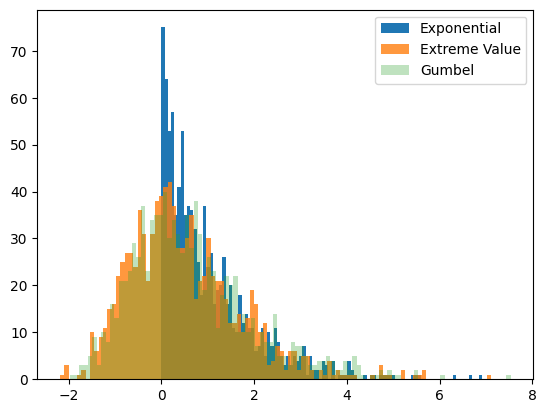

In [22]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
num_samples = 1000
y = np.random.exponential(alpha, num_samples)

_ = plt.hist(y, bins=100, label="Exponential")

n = 1000
y = []
for _ in range(num_samples):
    maximum = np.max(np.random.exponential(alpha, n))
    maximum = maximum - 1 / alpha * np.log(n)
    y.append(maximum)
_ = plt.hist(y, bins=100, label="Extreme Value", alpha=0.8)


y = np.random.gumbel(0, alpha, num_samples)
_ = plt.hist(y, bins=100, label="Gumbel", alpha=0.3)
plt.legend()

---

**Frechet分布**

$$
G(x) = \begin{cases}
1 - x^{-\alpha} & (x \geq 1) \\
0 & (x < 1)
\end{cases}
$$
のとき（パレート分布なので指数分布より裾が重いです）、$M_n$の分布は

$$
F_n(x) = \begin{cases}
(1 - x^{-\alpha})^n & (x \geq 1)\\
0 & (x < 1)
\end{cases}
$$
になります。

これは$n \to \infty$で$0$にいってしまうので、代わりに $\frac{M_n}{n^{1 / \alpha}}$を考えます (スケールをずらす)。
すると、

$$
\begin{aligned}
    P\left(\frac{M_n}{n^{1 / \alpha}} \leq x\right)
    = 
    P\left({M_n} \leq {n^{1 / \alpha}}x\right)
    = 
    \left(1 - \frac{1}{n} x^{-\alpha}\right)^n
    \to \exp(-x^{-\alpha})
\end{aligned}
$$

よって$n\to\infty$で$\frac{M_n}{n^{1 / \alpha}} \rightsquigarrow $ Frechet分布 ($F(x):= \exp(-x^{-\alpha})$ for $x \geq 0$)

---

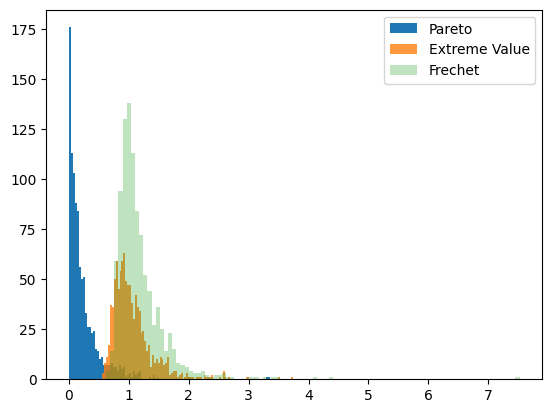

In [53]:
import numpy as np
from scipy.stats import invweibull
import matplotlib.pyplot as plt

alpha = 5
num_samples = 1000
y = np.random.pareto(alpha, num_samples)

_ = plt.hist(y, bins=100, label="Pareto")

n = 100000  # これがだいぶ大きくないと同じにならないかも...
y = []
for _ in range(num_samples):
    maximum = np.max(np.random.pareto(alpha, n))
    maximum = maximum / (n ** (1 / alpha))
    y.append(maximum)
_ = plt.hist(y, bins=100, label="Extreme Value", alpha=0.8)


y = invweibull.rvs(alpha, size=num_samples)
_ = plt.hist(y, bins=100, label="Frechet", alpha=0.3)
plt.legend()

---

**Weibull分布**

$$
G(x) = \begin{cases}
1 & (x \geq 1) \\
1 - (1 - x)^{\alpha} & (0 \leq x < 1) \\
0 & (x < 0)
\end{cases}
$$
のとき（特殊なBeta分布であり、有界です）、$M_n$の分布は

$$
F_n(x) = (1 - (1 - x^{-\alpha}))^n,  (0 \leq x \leq 1)
$$
になります。

これは$1$に退化した分布に収束するので、代わりに $n^{1 / \alpha}(M_n -1)$を考えます。
すると、

$$
\begin{aligned}
    P\left({n^{1 / \alpha}}(M_n - 1) \leq x\right)
    \to
    \left(1 - \frac{1}{n} x^{-\alpha}\right)^n
    \to 
    F_n(x) = 
    \begin{cases}
    1 & (x \geq 0) \\
    \exp(-(-x)^\alpha) & (x < 1)
    \end{cases}
\end{aligned}
$$

よって$n\to\infty$でWeibull分布に収束します。

---

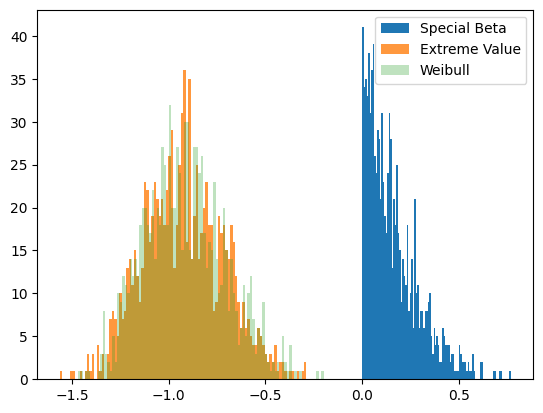

In [68]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 5
num_samples = 1000
bins = 1000
x = np.linspace(0, 1, bins)
Gx = 1 - (1 - x) ** alpha
gx = np.diff(Gx)
gx = np.hstack([0, gx])
y = np.random.choice(x, num_samples, p=gx)

_ = plt.hist(y, bins=100, label="Special Beta")

n = 1000  # これがだいぶ大きくないと同じにならないかも...
y = []
for _ in range(num_samples):
    maximum = np.max(np.random.choice(x, n, p=gx))
    maximum = (maximum - 1) * (n ** (1 / alpha))
    y.append(maximum)
_ = plt.hist(y, bins=100, label="Extreme Value", alpha=0.8)


y = -np.random.weibull(alpha, size=num_samples)
_ = plt.hist(y, bins=100, label="Weibull", alpha=0.3)
plt.legend()